In [1]:
#Importing our data. I want to predict ethereum price. 


import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
from datetime import datetime
#yfin.pdr_override()




In [2]:
aapl = pdr.get_data_yahoo('AAPL', start=datetime(2018,2,8), end=datetime(2022,3, 10))
gme = pdr.get_data_yahoo('GME', start=datetime(2018,2,8), end=datetime(2022,3, 10))
gld= pdr.get_data_yahoo('GLD', start=datetime(2018,2,8), end=datetime(2022,3, 10))
dow=pdr.get_data_yahoo('^DJI', start=datetime(2018,2,8), end=datetime(2022,3, 10))
eth=pdr.get_data_yahoo('ETH-USD', start=datetime(2018,2,8), end=datetime(2022,3, 10))
btc=pdr.get_data_yahoo('BTC-USD', start=datetime(2018,2,8), end=datetime(2022,3, 10))

In [3]:
aapl['id']='aapl'
gme['id']='gme'
gld['id']='gld'
dow['id']='dow'
eth['id']='eth'
btc['id']='btc'

In [4]:
df_stocks= pd.concat([aapl,gme,gld,dow,eth,btc])

In [5]:
df_stocks
df_stocks.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'id'], dtype='object')

In [6]:
#pivoting to create a dataset. 

cols_s=['id','Adj Close']

df1=df_stocks[cols_s]

In [7]:
df1.columns=['id','adj_close']
df1

,id,adj_close
Date,,
2018-02-08,aapl,37.049885
2018-02-09,aapl,37.503048
2018-02-12,aapl,39.013622
2018-02-13,aapl,39.404453
2018-02-14,aapl,40.130970
...,...,...
2022-03-07,btc,38062.039062
2022-03-08,btc,38737.269531
2022-03-09,btc,41982.925781


In [8]:
#testing a pivot table for our analysis. 
#Creating the adjusted close dataset. 


dfc =pd.pivot_table(df1,values=['adj_close'],index=['Date'],columns=['id'])

dfc =dfc.reset_index()

In [9]:
dfc

Date   adj_close                                           \
id                     aapl           btc           dow          eth   
0    2018-02-08   37.049885   8265.589844  23860.460938   817.807007   
1    2018-02-09   37.503048   8736.980469  24190.900391   883.864990   
2    2018-02-10         NaN   8621.900391           NaN   860.414978   
3    2018-02-11         NaN   8129.970215           NaN   814.659973   
4    2018-02-12   39.013622   8926.570312  24601.269531   868.706970   
...         ...         ...           ...           ...          ...   
1488 2022-03-07  159.300003  38062.039062  32817.378906  2497.771240   
1489 2022-03-08  157.440002  38737.269531  32632.640625  2576.747559   
1490 2022-03-09  162.949997  41982.925781  33286.250000  2729.783447   
1491 2022-03-10  158.520004  39437.460938  33174.070312  2608.048584   
1492 2022-03-11         NaN  38794.972656           NaN  2559.562988   

                              
id           gld         gme  
0     124.980003   13.830752  
1     124.769997   14.127813  
2            NaN         NaN  
3            NaN         NaN  
4     125.370003   13.804542  
...          ...         ...  
1488  186.410004   99.349998  
1489  191.509995  103.010002  
1490  185.820007  105.209999  
1491  186.399994  100.559998  
1492         NaN         NaN  

[1493 rows x 7 columns]

In [10]:
dfc_col = ['date','adj_close_aapl','adj_close_btc','adj_close_dow','adj_close_eth','adj_close_gld',
           'adj_close_gme',]

dfc.columns=dfc_col

In [11]:
#Printing out our dataframe 
dfc

,date,adj_close_aapl,adj_close_btc,adj_close_dow,adj_close_eth,adj_close_gld,adj_close_gme
0,2018-02-08,37.049885,8265.589844,23860.460938,817.807007,124.980003,13.830752
1,2018-02-09,37.503048,8736.980469,24190.900391,883.864990,124.769997,14.127813
2,2018-02-10,NaN,8621.900391,NaN,860.414978,NaN,NaN
3,2018-02-11,NaN,8129.970215,NaN,814.659973,NaN,NaN
4,2018-02-12,39.013622,8926.570312,24601.269531,868.706970,125.370003,13.804542
...,...,...,...,...,...,...,...
1488,2022-03-07,159.300003,38062.039062,32817.378906,2497.771240,186.410004,99.349998
1489,2022-03-08,157.440002,38737.269531,32632.640625,2576.747559,191.509995,103.010002
1490,2022-03-09,162.949997,41982.925781,33286.250000,2729.783447,185.820007,105.209999
1491,2022-03-10,158.520004,39437.460938,33174.070312,2608.048584,186.399994,100.559998


In [12]:
#Getting percent change values for our dataframe. 

dfc['date']=pd.to_datetime(dfc.date)

In [13]:
dfc = dfc.sort_values('date')

c1 =dfc

In [14]:
#Settinng index to date 
 
c1 =c1.set_index(c1['date'])

#dropping the date column 
c1 =c1.drop('date',axis=1)


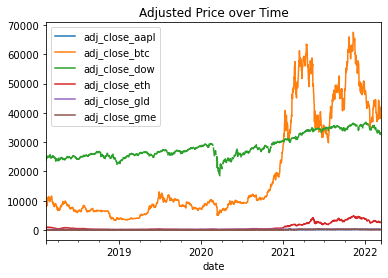

In [15]:
c1.plot(title="Adjusted Price over Time")

In [16]:
#Calculating the percent change of each adjusted price for time series analysis.
#this movement is what we will predict 

pc1= c1.pct_change(fill_method='ffill')
pc1=pc1*100
pc1

,adj_close_aapl,adj_close_btc,adj_close_dow,adj_close_eth,adj_close_gld,adj_close_gme
date,,,,,,
2018-02-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-09,1.223116,5.703049,1.384883,8.077454,-0.168032,2.147829
2018-02-10,0.000000,-1.317161,0.000000,-2.653122,0.000000,0.000000
2018-02-11,0.000000,-5.705589,0.000000,-5.317783,0.000000,0.000000
2018-02-12,4.027871,9.798315,1.696378,6.634301,0.480890,-2.288194
...,...,...,...,...,...,...
2022-03-07,-2.371757,-0.931664,-2.372234,-2.241302,1.486287,-11.024543
2022-03-08,-1.167609,1.774026,-0.562928,3.161872,2.735900,3.683949
2022-03-09,3.499742,8.378640,2.002931,5.939111,-2.971118,2.135712


In [17]:
#To model a regression I will shift the dataframe and caclulate the correlation. 
#I will then shift this data over and create a modified linear regression with the shifted
#data. 

In [18]:
#Subsetting for price movements for the past 200 days. 

pc_recent =pc1.tail(100)

In [19]:
#Setting up a function to shift the data.
def df_shift(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [36]:
pc1

,adj_close_aapl,adj_close_btc,adj_close_dow,adj_close_eth,adj_close_gld,adj_close_gme
date,,,,,,
2018-02-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-09,1.223116,5.703049,1.384883,8.077454,-0.168032,2.147829
2018-02-10,0.000000,-1.317161,0.000000,-2.653122,0.000000,0.000000
2018-02-11,0.000000,-5.705589,0.000000,-5.317783,0.000000,0.000000
2018-02-12,4.027871,9.798315,1.696378,6.634301,0.480890,-2.288194
...,...,...,...,...,...,...
2022-03-07,-2.371757,-0.931664,-2.372234,-2.241302,1.486287,-11.024543
2022-03-08,-1.167609,1.774026,-0.562928,3.161872,2.735900,3.683949
2022-03-09,3.499742,8.378640,2.002931,5.939111,-2.971118,2.135712


In [64]:
lagged_correlation

In [75]:
#Setting up a function to shift the data.
def df_shift(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

Shifting our dataframe for train test split and then model performance measurement. 

In [118]:
#Setting up our shifted dataframe. 
target_variable_user= 'adj_close_gme'
lag_val=1


pc1_new = df_shift(pc1, target_variable_user, lag=lag_val)


In [119]:

print(pc1.tail(10))
print(pc1_new.tail(10))

            adj_close_aapl  adj_close_btc  adj_close_dow  adj_close_eth  \
date                                                                      
2022-03-02        2.058824      -0.970630       1.791270      -0.752458   
2022-03-03       -0.198128      -3.351981      -0.285298      -3.920162   
2022-03-04       -1.840822      -7.806935      -0.532212      -7.666797   
2022-03-05        0.000000       0.671938       0.000000       1.821636   
2022-03-06        0.000000      -2.488799       0.000000      -4.120100   
2022-03-07       -2.371757      -0.931664      -2.372234      -2.241302   
2022-03-08       -1.167609       1.774026      -0.562928       3.161872   
2022-03-09        3.499742       8.378640       2.002931       5.939111   
2022-03-10       -2.718621      -6.063095      -0.337015      -4.459506   
2022-03-11        0.000000      -1.629132       0.000000      -1.859076   

            adj_close_gld  adj_close_gme  
date                                      
2022-03-02   

In [120]:
pc2 =pc1_new.dropna()

#Dropping all rows where apple is zero.

pc2= pc2[pc2[target_variable_user] != 0]

Using AIC criteria to build a model. I will compare just utilizing the dow to create model and then using all variables. Because I am using a lagged dataset, I can utilize the original train test split values to evaluate my predictions. 

In [121]:
#Setting up my data. X for dow and x for all variables. 
#User can either select the recent or the overall dataset from pc2 or pc2_r


import numpy as np

X=pc2.adj_close_dow
X_a=pc2.drop(columns=[target_variable_user])

y=np.sign(pc2[target_variable_user])

In [131]:
y.value_counts()




-1.0    534
 1.0    485
Name: adj_close_gme, dtype: int64

In [132]:
#prediction count values. 

534/(534+485)

0.5240431795878312

In [123]:
#Fitting Naive Bayes. 
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
print(cross_val_score(clf, X_a, y, cv=10))




[0.55882353 0.47058824 0.53921569 0.52941176 0.54901961 0.52941176
 0.51960784 0.55882353 0.53921569 0.5049505 ]


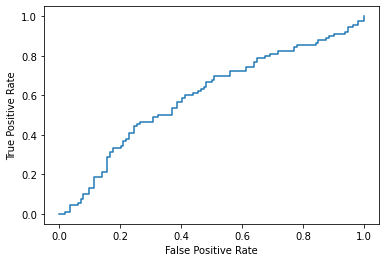

              precision    recall  f1-score   support

        -1.0       0.61      0.81      0.69       114
         1.0       0.58      0.33      0.42        90

    accuracy                           0.60       204
   macro avg       0.59      0.57      0.56       204
weighted avg       0.59      0.60      0.57       204



In [124]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test= train_test_split(X_a, y, test_size=.2, random_state=1)

clf = GaussianNB()
#from sklearn.naive_bayes import CategoricalNB
#m = CategoricalNB(alpha=0)
clf.fit(X_train,y_train)



y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred= clf.predict(X_test)

print(classification_report(y_test, y_pred))



In [125]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
print(cross_val_score(clf, X_a, y, cv=10))

[0.54901961 0.49019608 0.54901961 0.43137255 0.54901961 0.52941176
 0.46078431 0.54901961 0.51960784 0.52475248]


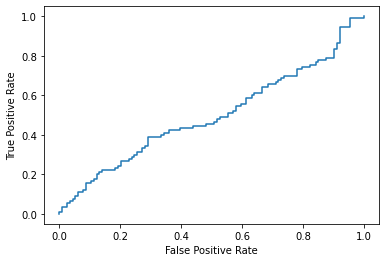

              precision    recall  f1-score   support

        -1.0       0.58      0.88      0.70       114
         1.0       0.56      0.20      0.30        90

    accuracy                           0.58       204
   macro avg       0.57      0.54      0.50       204
weighted avg       0.57      0.58      0.52       204



In [126]:
#Creating the logistic regression classifier roc curve and accuracy report

X_train, X_test, y_train, y_test= train_test_split(X_a, y, test_size=.2, random_state=1)

clf = LogisticRegression(random_state=0)
#from sklearn.naive_bayes import CategoricalNB
#m = CategoricalNB(alpha=0)
clf.fit(X_train,y_train)



y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred= clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [127]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
scores =cross_val_score(clf, X_a, y, cv=10)
print(scores)
print(sum(scores)/len(scores))

#we have a 3 percent edge on the market, not terrible. 

[0.50980392 0.50980392 0.54901961 0.50980392 0.54901961 0.5
 0.53921569 0.43137255 0.58823529 0.55445545]
0.5240729955348475


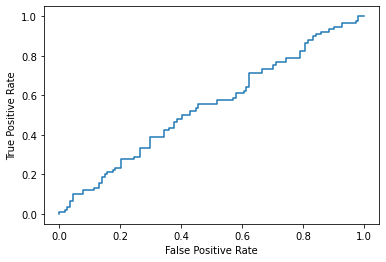

              precision    recall  f1-score   support

        -1.0       0.53      0.50      0.52       114
         1.0       0.41      0.44      0.43        90

    accuracy                           0.48       204
   macro avg       0.47      0.47      0.47       204
weighted avg       0.48      0.48      0.48       204



In [128]:
#Creating the roc curve and accuracy report for the svc classifier. 


X_train, X_test, y_train, y_test= train_test_split(X_a, y, test_size=.2, random_state=1)

clf = SVC(gamma='auto', probability = True)
#from sklearn.naive_bayes import CategoricalNB
#m = CategoricalNB(alpha=0)
clf.fit(X_train,y_train)



y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred= clf.predict(X_test)

print(classification_report(y_test, y_pred))